In [1]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# CSV 파일 불러오기
data = pd.read_csv("../merged_dataset/single_train/single_train.csv")
test_data = pd.read_csv("../extracted_keypoints/jumprope_test/sj_type1_9.csv")

In [3]:
# 'Frame'열을 제외한 모든 열 선택
feature_columns = data.columns[1:-1]

# 입력 데이터(X)와 레이블(Y) 분리
X = data[feature_columns].values
Y = data['Label'].values

X_test = test_data[feature_columns].values
Y_test = test_data['Label'].values



# standardscaler로 데이터 정규화
scaler = StandardScaler()



X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)


X=X.astype(int)
Y=Y.astype(int)

X_test=X_test.astype(int)
Y_test=Y_test.astype(int)

C:\Users\KJW\AppData\Local\Temp\ipykernel_26088\611039747.py:22: RuntimeWarning: invalid value encountered in cast
  X=X.astype(int)


In [4]:
# train-valid 데이터 분할 (80%, 20%)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
model = SVC(probability=True)

In [6]:
# 모델들 학습 및 평가
model.fit(X, Y)

SVC(probability=True)

In [7]:
# 모델들 학습 및 평가

Y_prob = model.predict_proba(X_test)[:, 1]  
auc_score = roc_auc_score(Y_test, Y_prob)

# 임계값 설정
threshold = 0.5  # 예측된 확률이 0.5 이상이면 클래스를 1로 예측

# 예측된 확률을 클래스 레이블로 변환
Y_pred_binary = (Y_prob >= threshold).astype(int)

# Precision 계산
precision = precision_score(Y_test, Y_pred_binary)

# Recall 계산
recall = recall_score(Y_test, Y_pred_binary)


In [8]:
# 결과 출력
print("Precision:", precision)
print("Recall:", recall)
print(f"AUC score : {auc_score}")

Precision: 0.5071428571428571
Recall: 1.0
AUC score : 0.8676260461318637


In [9]:
# 테스트 데이터에 대한 예측 결과를 얻기 위해 모델 사용
predictions = model.predict_proba(X_test)[:,1]

# 이동 평균을 계산하여 예측값 부드럽게 만들기
smoothed_predictions = np.convolve(predictions.squeeze(), np.ones(5)/5, mode='same')

# 테스트 데이터에 대한 예측 결과를 바이너리 형태로 변환
binary_predictions = (smoothed_predictions > 0.5).astype(int)

In [10]:
# 0에서 1로 바뀌는 구간에서 줄넘기 개수 카운트
jump_count = np.sum(np.diff(binary_predictions.flatten()) > 0)

In [11]:
# 테스트 데이터의 점프수
print(f'Predicted Jump Count: {jump_count}')


Predicted Jump Count: 1


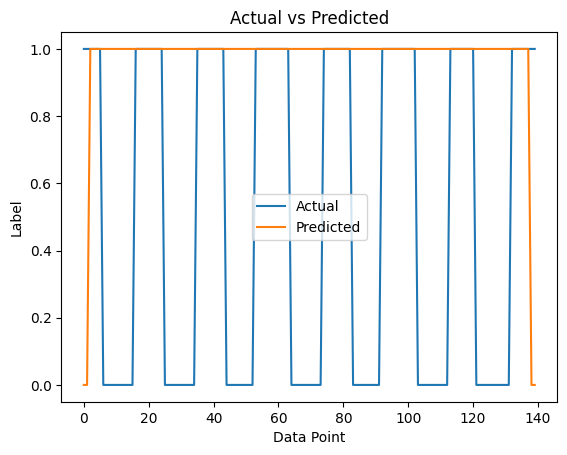

In [12]:
# 테스트 데이터 1에 대한 예측 결과

plt.plot(Y_test, label='Actual')
plt.plot(binary_predictions.flatten(), label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('Label')
plt.legend()
plt.show()